In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specify the column names
column_names = ['ID', 'Brand', 'Sentiment', 'Text']

In [3]:
# Load the data without header and assign column names
validation_data = pd.read_csv('twitter_validation.csv', header=None, names=column_names)
training_data = pd.read_csv('twitter_training.csv', header=None, names=column_names)

In [4]:
# Display the first few rows of the data to ensure correctness
print("Validation Data:")
print(validation_data.head())
print("\nTraining Data:")
print(training_data.head())

Validation Data:
     ID      Brand   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  

Training Data:
     ID        Brand Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im c

In [5]:
# Data Cleaning: Ensure that the necessary columns are present
required_columns = ['ID', 'Brand', 'Sentiment', 'Text']
validation_data = validation_data[required_columns]
training_data = training_data[required_columns]

In [6]:
# Combine the two datasets for comprehensive analysis
data = pd.concat([validation_data, training_data])


In [7]:
# Display info to check the combined dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         75682 non-null  int64 
 1   Brand      75682 non-null  object
 2   Sentiment  75682 non-null  object
 3   Text       74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB
None


In [8]:
# Sentiment Distribution by Brand
sentiment_by_brand = data.groupby(['Brand', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_by_brand)

Sentiment                          Irrelevant  Negative  Neutral  Positive
Brand                                                                     
Amazon                                    195       582     1254       319
ApexLegends                               195       606      959       652
AssassinsCreed                            265       382      160      1470
Battlefield                               930       481      364       597
Borderlands                               242       431      612      1034
CS-GO                                     644       350      565       777
CallOfDuty                                683       902      385       455
CallOfDutyBlackopsColdWar                 584       579      366       874
Cyberpunk2077                             488       391      472       983
Dota2                                     427       776      599       589
FIFA                                      568      1192      106       512
Facebook                 

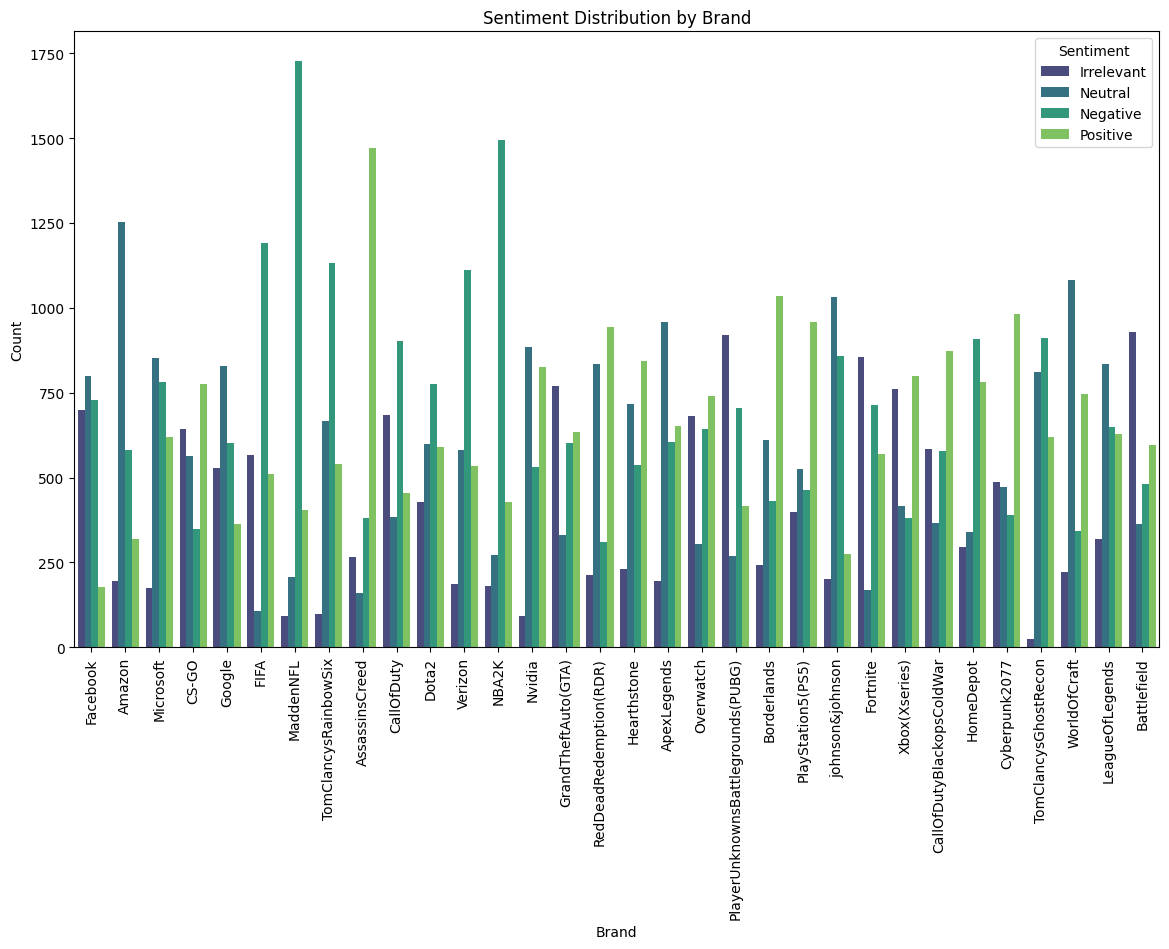

In [9]:
# Visualization
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Brand', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\p\AppData\Local\Temp\ipykernel_22940\3167186971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='viridis')


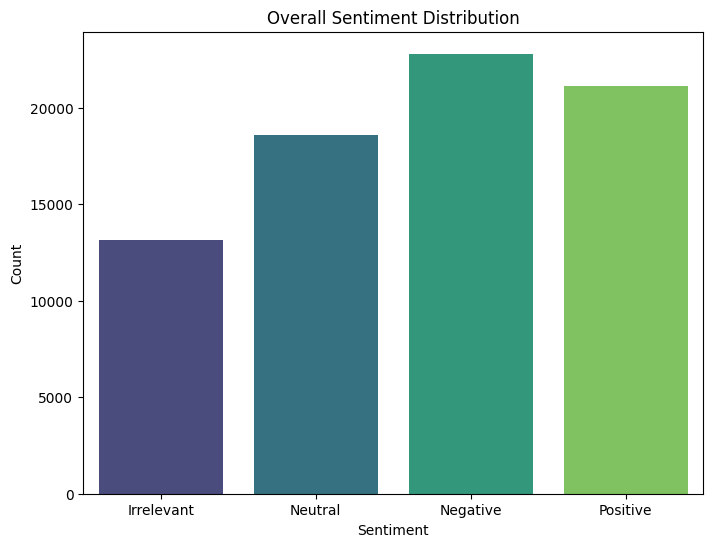

In [10]:
# Sentiment Distribution Overall
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
